# **Tugas Besar Analisis Data Spasial**
> Kelompok 4

## **Import Library**

In [1]:
# LIBRARY YANG DIGUNAKAN
import folium                                # Membuat peta interaktif berbasis Leaflet.js
import pandas as pd                          # Library analisis data tabular
import numpy as np                           # Pemrosesan matriks dan vektor
import matplotlib.pyplot as plt              # Pembuatan plot
import seaborn as sns                        # Pembuatan plot estetik
from geopy.distance import geodesic          # Menghitung jarak dari geologi didalam pemrogaman
from datetime import datetime                # Pengaturan tanggal dan waktu
import geopandas as gpd                      # analisis data geospasial dengan pandas
from shapely.geometry import Point           # Manipulasi geometri titik
from geopy.distance import great_circle      # Menghitung jarak dari 2 titik geografis dalam lintang dan bujur
from sklearn.cluster import DBSCAN as dbscan # Algoritma DBSCAN
import math                                  # oprasi matematika dasar
import matplotlib.pyplot as plt              # Pembuatan Plot dasar
from mpl_toolkits.mplot3d import Axes3D      # Pembuatan plot 3 dimensi

## **Checking Requirement of Library**

In [2]:
print(f"Versi Library Pandas : ",pd.__version__)
print(f"Versi Library Seaborn :",sns.__version__)
print(f"Versi Library Folium : ",folium.__version__) # Folium yang dipakai adalah

Versi Library Pandas :  2.0.3
Versi Library Seaborn : 0.13.1
Versi Library Folium :  0.14.0


## **Calling Dataset**


In [5]:
data = pd.read_csv("/content/Temporal_CleanData_Coordinate_UMKM_Prabumulih.csv")
data.head()

,Tanggal,Latitude,Longitude
0,2024-04-01,-3.44076,104.22068
1,2024-04-01,-3.43773,104.22062
2,2024-04-01,-3.43845,104.22061
3,2024-04-01,-3.43771,104.22066
4,2024-04-01,-3.41940,104.22678


## **Procesing Data with SHP File**

In [3]:
shapefile = '/content/ADMINISTRASIKECAMATAN_AR_50K.shp'
gdf_boundary = gpd.read_file(shapefile)

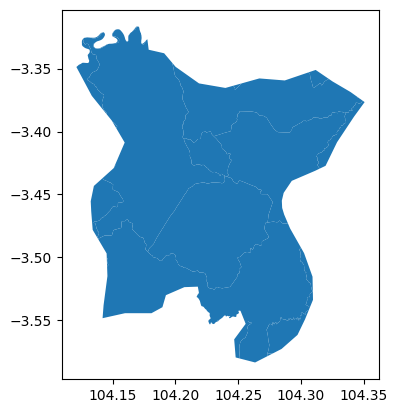

In [4]:
gdf_boundary.plot()
plt.show()

In [7]:
data['geometry'] = data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(data, geometry='geometry')

In [8]:
# Jika gdf_boundary memiliki beberapa geometri, gunakan unary_union
gdf_boundary_union = gdf_boundary.unary_union
# Filter data untuk menyertakan hanya yang berada dalam batas wilayah
gdf_within_boundary = gdf[gdf.within(gdf_boundary_union)]

In [9]:
# Simpan data yang berada dalam batas wilayah ke CSV atau format lain
gdf_within_boundary.to_csv("prabumulih_umkm.csv", index=False)

In [10]:
sumsel = pd.read_csv("prabumulih_umkm.csv")
df = sumsel[['Latitude', 'Longitude']].values

### **Pembuatan Garis Lintang dan Bujur**

In [11]:
# Pembuatan fungsi pembuatan garis lintang dan garis bujur
def greatcircle(x,y):
  lat1, long1 = x[0], x[1]
  lat2, long2 = y[0], y[1]
  dist = great_circle((lat1,long1),(lat2,long2)).meters
  return dist

### **`Hasil DBSCAN`**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
# Ensure 'lampung' DataFrame exists and has 'latitude' and 'longitude' columns
# (Assuming 'lampung' is a pre-defined DataFrame)
if 'sumsel' not in globals():
  raise ValueError("DataFrame 'sumsel' not defined.")
if 'latitude' not in sumsel.columns or 'longitude' not in sumsel.columns:
  raise ValueError("The 'lampung' DataFrame must contain 'latitude' and 'longitude' columns.")

# Create a copy of the relevant data
df_dbc = sumsel[['latitude', 'longitude']].copy()  # Copy to preserve original data
# Ensure df_dbc is a DataFrame and contains the required columns
if not isinstance(df_dbc, pd.DataFrame):
  raise TypeError("Expected 'df_dbc' to be a Pandas DataFrame.")
# Define a simple great-circle distance function (in degrees)
def greatcircle(coords):
  # Converts degrees to radians
  coords = np.radians(coords)
  return haversine_distances([coords]) * 6371000  # Earth's radius in meters

# Apply DBSCAN clustering
# Use metric='euclidean' or haversine-based distances if great-circle metric is too complex

dbc = DBSCAN(eps=0.04, min_samples=4, metric='euclidean').fit(df_dbc)
# Get the cluster labels
labels = dbc.labels_
unique_labels = np.unique(labels)
print("Unique labels:", unique_labels)
# Add the cluster labels to the DataFrame
df_dbc['Cluster'] = labels

Unique labels: [-1  0]


In [ ]:
location = df_dbc['latitude'].mean(), df_dbc['longitude'].mean()
m = folium.Map(location=location,zoom_start=8)

folium.TileLayer('cartodbpositron').add_to(m)

clust_colours =  ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6',
                  '#6a3d9a','#ffff99','#b15928','#5F9EA0','#DC143C','#00FFFF','#B8860B','#8B008B','#2F4F4F']

for i in range(0,len(df_dbc)):
  colouridx = df_dbc['Cluster'].iloc[i]
  if colouridx == -1:
    pass
  else:
    col = clust_colours[colouridx%len(clust_colours)]
    folium.CircleMarker([df_dbc['latitude'].iloc[i],df_dbc['longitude'].iloc[i]],
radius = 1, color = col, fill = col).add_to(m)

m

## **Hasil UMKM**

In [12]:
!pip install st_dbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.9/414.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for st_dbscan: filename=st_dbscan-0.2.2-py2.py3-none-any.whl size=6844 sha256=04b667fcff078598f4e91390a77f5fa7791c4e4d4d5874b72aa66d6073829044
  Stored in directory: /root/.cache/pip/wheels/c5/fe/0d/cf118a578d5e619ab04ddd9669412fb5cf3b973b7abe6a3088
Successfully built st_dbscan


In [16]:
import folium
from folium import plugins
from math import sin, cos, sqrt, atan2, radians
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN

def great_circle_distance(coords1, coords2):
    R = 6373.0  # Radius bumi dalam kilometer

    lat1, lon1 = radians(coords1[0]), radians(coords1[1])
    lat2, lon2 = radians(coords2[0]), radians(coords2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

X = data[['Latitude', 'Longitude']].values
distances = pairwise_distances(X, metric=great_circle_distance)

db = DBSCAN(eps=0.1, min_samples=2, metric='precomputed').fit(distances)
labels = db.labels_

In [19]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
m = folium.Map(location=[-3.45, 104.25], zoom_start=12)

for label, color in zip(set(labels), colors):
    if label == -1:
        continue  # Abaikan noise

    cluster_data = data[labels == label]
    cluster_locations = cluster_data[['Latitude', 'Longitude']].values.astype(float)

    folium.GeoJson(
        {'type': 'FeatureCollection',
         'features': [{'type': 'Feature',
                       'geometry': {'type': 'Point',
                                    'coordinates': [coord[1], coord[0]]},
                       'properties': {'cluster': int(label)}} for coord in cluster_locations]},
        name=f'Cluster {label}',
        overlay=True,
        tooltip=folium.GeoJsonTooltip(fields=['cluster']),
        style_function=lambda feature: {'fillColor': color, 'color': 'black', 'weight': 2, 'fillOpacity': 0.5}
    ).add_to(m)

noise_locations = data[labels == -1][['Latitude', 'Longitude']].values.astype(float)
folium.GeoJson(
    {'type': 'FeatureCollection',
     'features': [{'type': 'Feature',
                   'geometry': {'type': 'Point',
                                'coordinates': [coord[1], coord[0]]},
                   'properties': {'cluster': 'Noise'}} for coord in noise_locations]},
    name='Noise',
    overlay=True,
    tooltip=folium.GeoJsonTooltip(fields=['cluster']),
    style_function=lambda feature: {'fillColor': 'black', 'color': 'black', 'weight': 2, 'fillOpacity': 0.5}
).add_to(m)

folium.LayerControl().add_to(m)
m

## **Testing**

In [22]:
def plot_clusters(X, eps=0.05, min_samples_list=[2, 4, 6]):
    fig, axs = plt.subplots(1, len(min_samples_list), figsize=(15, 5))

    for n_samples, ax in zip(min_samples_list, axs):
        db = DBSCAN(eps=eps, min_samples=n_samples, metric='euclidean').fit(X[:, :2])
        labels = db.labels_

        core_samples = np.zeros_like(labels, dtype=bool)
        core_samples[db.core_sample_indices_] = True

        ax.scatter(X[core_samples, 0], X[core_samples, 1], c='b', label='Core Samples')
        ax.scatter(X[~core_samples, 0], X[~core_samples, 1], c='r', label='Non-Core Samples')
        ax.set_title(f'min_samples={n_samples}')

    plt.legend()
    plt.show()

In [23]:
# Mengonversi data ke format yang sesuai untuk analisis ST-DBSCAN
X = data[['Latitude', 'Longitude', 'Tanggal']].values

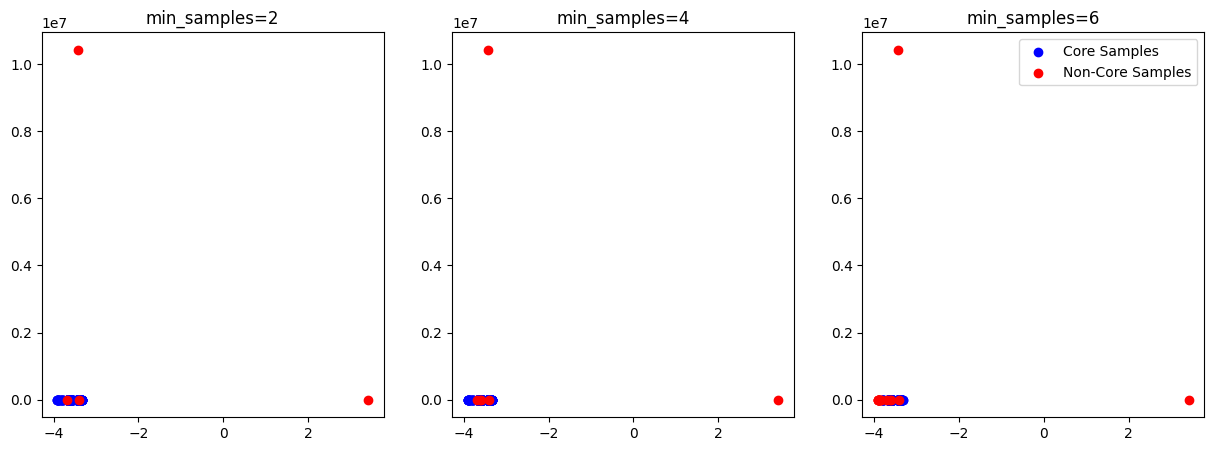

In [24]:
plot_clusters(X)

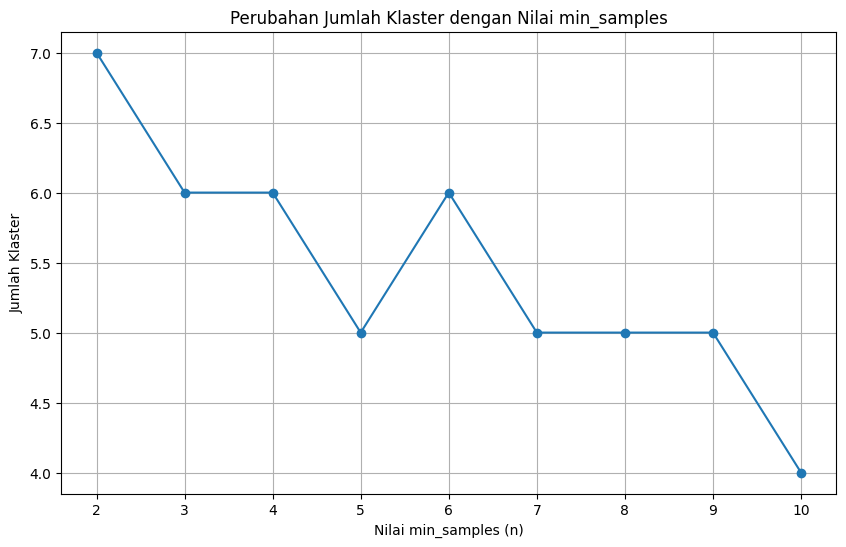

In [25]:
# Fungsi untuk menghitung jumlah klaster
def count_clusters(X, eps=0.05, min_samples=2):
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(X[:, :2])
    return len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

# Membuat line plot
min_samples_range = range(2, 11)
num_clusters = [count_clusters(X, min_samples=n) for n in min_samples_range]

plt.figure(figsize=(10, 6))
plt.plot(min_samples_range, num_clusters, marker='o')
plt.xlabel('Nilai min_samples (n)')
plt.ylabel('Jumlah Klaster')
plt.title('Perubahan Jumlah Klaster dengan Nilai min_samples')
plt.grid(True)
plt.show()